# Appendix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.ticker as ticker
import scipy.stats

# Data loading

In [2]:
#load in the pork price and calculate the monthly pork price
pork_price_original = pd.read_excel('22个省市_平均价_猪肉.xlsx')
pork_price_original.columns = ['date','pork_price']
pork_price_monthly = pork_price_original
pork_price_monthly['date'] = pd.to_datetime(pork_price_monthly['date'])
pork_price_monthly['date'] = pork_price_monthly['date'].dt.strftime('%Y-%m')
pork_price_monthly = pork_price_monthly.groupby(['date']).mean()
pork_price_monthly['date'] = pork_price_monthly.index
pork_price_monthly = pork_price_monthly.reset_index(drop=True)
pork_price_monthly

,pork_price,date
0,11.159000,2006-07
1,13.000000,2006-09
2,12.791333,2006-10
3,13.370000,2006-11
4,14.845000,2006-12
...,...,...
191,28.266000,2022-07
192,29.047500,2022-08
193,31.128000,2022-09
194,35.675000,2022-10


In [3]:
#load in the monthly cpi value
cpi = pd.read_excel('CPI_所有项目_中国.xlsx')
cpi.columns = ['date','cpi_value']
cpi['date'] = pd.to_datetime(cpi['date'])
cpi['date'] = cpi['date'].dt.strftime('%Y-%m')
cpi

,date,cpi_value
0,1993-01,37.06709
1,1993-02,37.27705
2,1993-03,37.96701
3,1993-04,39.06402
4,1993-05,39.64885
...,...,...
352,2022-05,102.70000
353,2022-06,102.70000
354,2022-07,103.20000
355,2022-08,103.10000


Here we use the monthly data because the cpi value is monthly. We want to use a more precise adjusted pork price. So, we first calculate the monthly adjusted pork price and then convert it to the yearly basis.

In [4]:
#calculate the annually average amount of sow
amount_female = pd.read_excel('生猪存栏_能繁母猪.xlsx')
amount_female.columns = ['date','total_amount_female']
amount_female['date'] = pd.to_datetime(amount_female['date'])
amount_female['date'] = amount_female['date'].dt.strftime('%Y')
amount_female = amount_female.groupby(['date']).mean()
amount_female['date'] = amount_female.index
amount_female = amount_female.reset_index(drop=True)
amount_female

,total_amount_female,date
0,4887.583333,2009
1,4729.166667,2010
2,4788.666667,2011
3,4990.000000,2012
4,5010.083333,2013
5,4590.250000,2014
6,3932.666667,2015
7,3736.500000,2016
8,3557.500000,2017
9,3228.833333,2018


In [5]:
#the number of hog supplied per year
amount_sale = pd.read_excel('肉猪出栏头数.xlsx')
amount_sale.columns = ['date','total_amount_sale']
amount_sale['date'] = pd.to_datetime(amount_sale['date'])
amount_sale['date'] = amount_sale['date'].dt.strftime('%Y')
amount_sale

,date,total_amount_sale
0,1996,41225.2
1,1997,46483.7
2,1998,50215.1
3,1999,51977.2
4,2000,51862.3
5,2001,53281.1
6,2002,54143.9
7,2003,55701.8
8,2004,57278.5
9,2005,60367.4


In [6]:
#load in the female piglet price
piggy_price = pd.read_excel('22个省市_平均价_仔猪.xlsx')
piggy_price.columns = ['date','piggy_price']
piggy_price['date'] = pd.to_datetime(piggy_price['date'])
piggy_price['date'] = piggy_price['date'].dt.strftime('%Y')
piggy_price = piggy_price.groupby(['date']).mean()
piggy_price['date'] = piggy_price.index
piggy_price = piggy_price.reset_index(drop=True)
piggy_price

,piggy_price,date
0,12.715889,2006
1,23.605917,2007
2,32.865490,2008
3,20.802760,2009
4,19.436538,2010
5,31.899000,2011
6,30.310400,2012
7,27.057959,2013
8,24.240400,2014
9,31.729167,2015


In [7]:
#load in the monthly forage price
#forage_price = pd.read_excel('平均价_育肥猪配合饲料.xlsx')
forage_price = pd.read_excel('平均价_生猪饲料.xlsx')
forage_price.columns = ['date','forage_price']
forage_price['date'] = pd.to_datetime(forage_price['date'])
forage_price['date'] = forage_price['date'].dt.strftime('%Y-%m')
forage_price = forage_price.groupby(['date']).mean()
forage_price['date'] = forage_price.index
forage_price = forage_price.reset_index(drop=True)
forage_price

,forage_price,date
0,2.656667,2015-06
1,2.736000,2015-07
2,2.667500,2015-08
3,2.605000,2015-09
4,2.532500,2015-10
...,...,...
85,3.520000,2022-07
86,3.524000,2022-08
87,3.687500,2022-09
88,3.860000,2022-10


In [8]:
forage_price.mean()

forage_price    2.767944
dtype: float64

In [9]:
forage_price.std()

forage_price    0.445601
dtype: float64

In [10]:
forage_price.mean()+forage_price.std()

forage_price    3.213546
dtype: float64

In [11]:
forage_price.mean()-forage_price.std()

forage_price    2.322343
dtype: float64

#  Data preprocessing and analysis

In [12]:
# calculate the monthly adjusted pork price
de_cpi_price = pd.merge(cpi,pork_price_monthly,how='inner')
de_cpi_price['de_price'] = (de_cpi_price['pork_price']/de_cpi_price['cpi_value'])*100
de_cpi_price

,date,cpi_value,pork_price,de_price
0,2006-07,67.95898,11.159000,16.420199
1,2006-09,68.50367,13.000000,18.977085
2,2006-10,68.57217,12.791333,18.653826
3,2006-11,68.77789,13.370000,19.439387
4,2006-12,69.74078,14.845000,21.285968
...,...,...,...,...
189,2022-05,102.70000,21.972500,21.394839
190,2022-06,102.70000,22.425000,21.835443
191,2022-07,103.20000,28.266000,27.389535
192,2022-08,103.10000,29.047500,28.174103


In [13]:
#compare trends of adjusted price and the forage price
de_price_monthly = de_cpi_price[['date','de_price']]
forage_price = pd.merge(de_price_monthly,forage_price,how='inner')
forage_price

,date,de_price,forage_price
0,2015-06,25.319280,2.656667
1,2015-07,28.075225,2.736000
2,2015-08,30.122443,2.667500
3,2015-09,30.200686,2.605000
4,2015-10,28.769642,2.532500
...,...,...,...
83,2022-05,21.394839,3.637500
84,2022-06,21.835443,3.610000
85,2022-07,27.389535,3.520000
86,2022-08,28.174103,3.524000


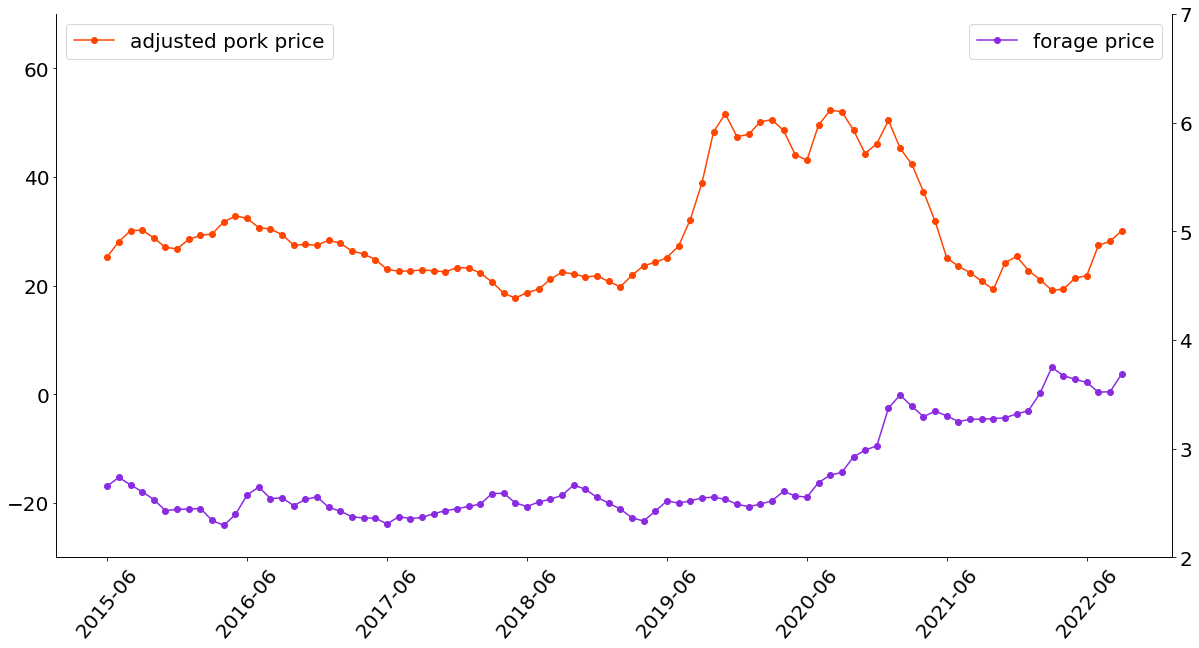

In [14]:
plt.figure(figsize=(20,10))
plt.ylim(-30,70)
plt.xticks(rotation=50)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=12))
ax.spines['top'].set_color('none')
plt.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=12))
ax.spines['top'].set_color('none')
plt.plot(forage_price['date'], forage_price['de_price'], color='orangered', marker='o', linestyle='-', label='adjusted pork price')
l1 = plt.legend(loc=2,prop={'size':20})
ax2=ax.twinx()
ax2.plot(forage_price['date'], forage_price['forage_price'], color='blueviolet', marker='o', linestyle='-', label='forage price')
ax2.set_ylim([2,7])
ax2.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=12))
ax.spines['top'].set_color('none')
plt.legend(loc=1,prop={'size':20})

In [15]:
forage_price['forage_price'].mean()

2.7426704545454546

In [16]:
forage_price['forage_price'].std()

0.4171817345022973

In [17]:
forage_price['de_price'].corr(forage_price['forage_price'])

-0.002308801039743526

In [18]:
# calculate the annually adjusted pork price and put the number of hog supply to the table
de_cpi_price['date'] = pd.to_datetime(de_cpi_price['date'])
de_cpi_price['date'] = de_cpi_price['date'].dt.strftime('%Y')
de_cpi_price = de_cpi_price.groupby(['date']).mean()
de_cpi_price['date'] = de_cpi_price.index
de_cpi_price = de_cpi_price.reset_index(drop=True)
de_cpi_price = pd.merge(de_cpi_price,amount_sale,how='inner')
de_cpi_price

,cpi_value,pork_price,de_price,date,total_amount_sale
0,68.710698,13.033067,18.955293,2006,61209.0
1,71.901943,18.733004,25.984452,2007,56640.9
2,76.162313,22.879333,30.026348,2008,61278.9
3,75.607726,17.642937,23.327972,2009,64990.9
4,78.008517,18.031181,23.091733,2010,67332.7
5,82.341031,25.795333,31.303684,2011,67030.0
6,84.497974,23.331000,27.608342,2012,70724.5
7,86.712708,23.040417,26.566778,2013,72768.0
8,88.379016,20.972514,23.728157,2014,74951.5
9,89.649043,23.207708,25.881365,2015,72415.6


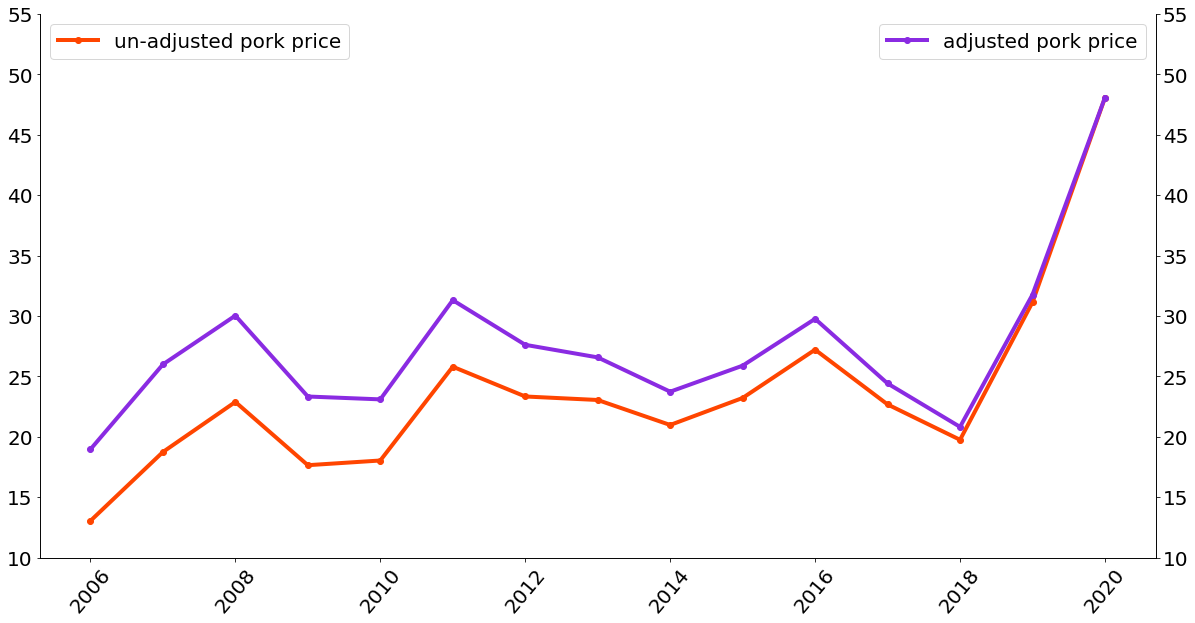

In [19]:
# visualize the effect of cpi adjustment on the pork price
plt.figure(figsize=(20,10))
plt.ylim(10,55)
x_major_locator=MultipleLocator(2)
plt.xticks(rotation=50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.plot(de_cpi_price['date'], de_cpi_price['pork_price'], color='orangered', marker='o', linestyle='-', linewidth=4.0, label='un-adjusted pork price')
l1 = plt.legend(loc=2,prop={'size':20})
ax2=ax.twinx()
ax2.plot(de_cpi_price['date'], de_cpi_price['de_price'], color='blueviolet', marker='o', linestyle='-', linewidth=4.0, label='adjusted pork price')
ax2.set_ylim([10,55])
ax2.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.legend(loc=1,prop={'size':20})

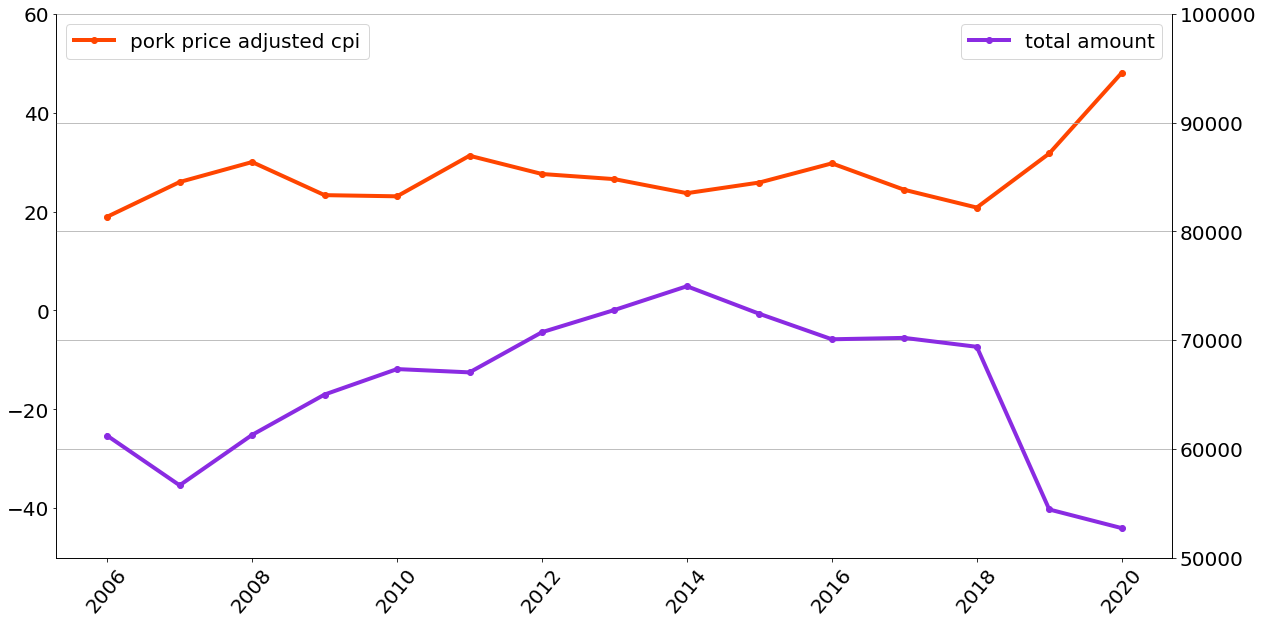

In [20]:
# visualize the relationship between number of supply and the price
plt.figure(figsize=(20,10))
plt.ylim(-50,60)
x_major_locator=MultipleLocator(2)
plt.xticks(rotation=50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.plot(de_cpi_price['date'], de_cpi_price['de_price'], color='orangered', marker='o', linestyle='-', linewidth=4.0, label='pork price adjusted cpi')
l1 = plt.legend(loc=2,prop={'size':20})
ax2=ax.twinx()
ax2.plot(de_cpi_price['date'], de_cpi_price['total_amount_sale'], color='blueviolet', marker='o', linestyle='-', linewidth=4.0, label='total amount')
ax2.set_ylim([50000,100000])
ax2.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.legend(loc=1,prop={'size':20})
plt.grid()

In [21]:
# obtain the statistic of piglet price
piggy_price['piggy_price'].mean()

37.44180907712788

In [22]:
piggy_price['piggy_price'].std()

22.510019598469743

# Solving the model

## The hog supply-pork price transmission mechanism

In [23]:
#regression to find the price function
de_cpi_price = de_cpi_price.sort_values(by='total_amount_sale')
x = de_cpi_price[['total_amount_sale']].values
y = de_cpi_price['de_price']

regr = LinearRegression()
regr.fit(x,y)

regr.coef_

array([-0.00051957])

In [24]:
regr.intercept_

61.577062399581195

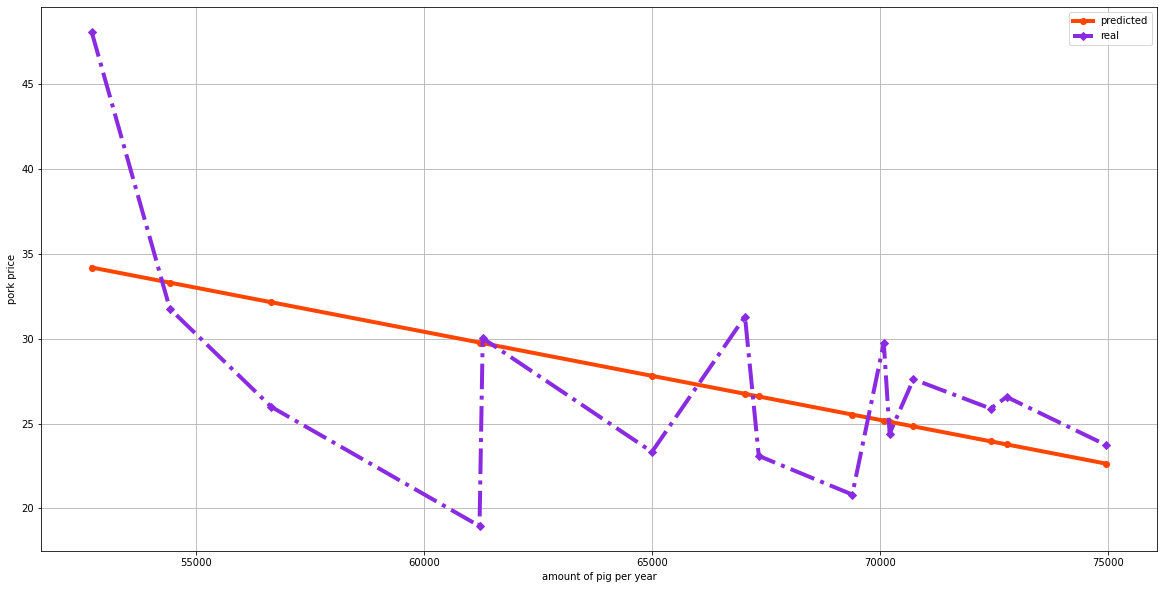

In [25]:
#plot the regression
plt.figure(figsize=(20,10))
plt.plot(de_cpi_price['total_amount_sale'], regr.predict(x), color='orangered', marker='o', linestyle='-', linewidth=4.0, label='predicted')
plt.plot(de_cpi_price['total_amount_sale'], de_cpi_price['de_price'], color='blueviolet', marker='D', linestyle='-.', linewidth=4.0, label='real')
plt.legend()  # 显示图例
plt.xlabel("amount of pig per year")  # X轴标签
plt.ylabel("pork price")  # Y轴标签
plt.grid()
plt.show()

In [26]:
#evalutaing the regression
x2 = sm.add_constant(x)
est = sm.OLS(y,x2).fit()
est.summary()

C:\Users\Davi-Psc\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               de_price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     5.116
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0415
Time:                        15:15:05   Log-Likelihood:                -47.081
No. Observations:                  15   AIC:                             98.16
Df Residuals:                      13   BIC:                             99.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5771     15.181      4.056      0.001      28.781      94.373
x1            -0.0005      0.000     -2.262      0.041      -0.001   -2.33e-05
==============================================================================
Omnibus:                        2.729   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                0.842
Skew:                           0.451   Prob(JB):                        0.656
Kurtosis:                       3.730   Cond. No.                     6.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The age structure of female pigs and hogs

### The age structure of female pigs

In [27]:
#we obtain the survival rates and birth rates for all classes of female pigs
death_f_1 = (33/53)*0.9808+(20/53)*0.9638
birth_f_1 = 0.8/5
death_f_2 = (40/53)*0.969+(13/53)*0.9628
birth_f_2 = (53/20)*birth_f_1/2

fem_s_annual = [death_f_1]
fem_b_annual = [birth_f_1]

i = 2
while i<= 5:
    fem_s_annual.append(death_f_2)
    fem_b_annual.append(birth_f_2)
    i+=1

#the survival and birth matrix L of female pigs
fem_b_annual_c = np.array([fem_b_annual])*death_f_1
diagnal_f_annual = np.diag(fem_s_annual[1:])
zero_column_f_annual = np.zeros((diagnal_f_annual.shape[0],1))
lower_annual = np.c_[diagnal_f_annual,zero_column_f_annual]
L_female_annual = np.r_[fem_b_annual_c,lower_annual]
L_female_annual

array([[0.15590158, 0.2065696 , 0.2065696 , 0.2065696 , 0.2065696 ],
       [0.96747925, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.96747925, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.96747925, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.96747925, 0.        ]])

In [28]:
# we analyze the age structure of female pigs during the natural condition
eigen_value = np.linalg.eig(L_female_annual)
structure = fem_s_annual/eigen_value[0][0]
structure

array([1.00224802+0.j, 0.99514489+0.j, 0.99514489+0.j, 0.99514489+0.j,
       0.99514489+0.j])

In [29]:
# we assume the age structure of female pigs in 2006 follows the natural condition
average_female_second_end = 4887.583333
amount_weighted = []
for i in range(5):
    amount_weighted.append(0.99514489**i)
amount_weighted = np.array(amount_weighted)
amount_mature = sum(amount_weighted[1:])
factor = average_female_second_end/amount_mature
initial_female = amount_weighted*factor
initial_female
# this is the population of each age class in 2005

array([1236.83555468, 1230.83058201, 1224.85476415, 1218.90795953,
       1212.99002731])

In [30]:
# calculate the population of female pigs in 2006
initial_female_2006 = L_female_annual@initial_female
initial_female_2006

array([1202.45075731, 1196.61272898, 1190.80304256, 1185.0215628 ,
       1179.26815276])

### The age structure of hogs

In [31]:
# calculate the age vector of hogs
survival_hog = 0.824*0.973
birth_s_1 = 0.8*0.95*10
birth_s_2 = birth_s_1*(53/20)
birth_hog = np.array([birth_s_1,birth_s_2,birth_s_2,birth_s_2,birth_s_2])
birth_hog = birth_hog-np.array(fem_b_annual)
birth_hog

array([ 7.44 , 19.928, 19.928, 19.928, 19.928])

In [32]:
#calculate the amount of hogs in 2006
hog_initial_2006 = sum(birth_hog*initial_female)*survival_hog
hog_initial_2006

85468.2201332038

## The supply adjustment

In [33]:
#define the function to calculate the profit
def profit(hog_n,female_n,last_price):
    revenue = hog_n*70*last_price
    cost = (hog_n+sum(female_n))*2.74*1.5*365+0.2*revenue
    profit = revenue - cost
    return profit

In [34]:
#optimal problem to find the adjustment for each year
def supply(female_begin,last_pr,last_profit):

    fun = lambda x : (-(sum(birth_hog*female_begin)+birth_hog[0]*x)*70*regr.predict(np.array([(sum(birth_hog*female_begin)+x*birth_hog[0])]))-((x*birth_hog[0]+x*L_female_annual[0,0])*2.74*1.5*365+x*30*37.4)) # 目标函数
    cons = (
            {'type': 'ineq', 'fun': lambda x: x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: -x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: last_profit-((x*birth_hog[0]+x*L_female_annual[0,0])*2.74*1.5*365+x*30*37.4)},
           )

    x0 = 500 # 设置初始值(随机设置即可)

    res = minimize(fun, x0, method='SLSQP', constraints=cons) # 调用最小值模块
    solution = res.x
    return solution

# The simulation

In [35]:
#simulate the whole process from 2009 to 2022

price_2006 = regr.predict(np.array([[hog_initial_2006]]))[0]
profit_2006 = profit(hog_initial_2006.flatten(order='A'),initial_female.flatten(order='A'),price_2006)

year = [2006]
female = [initial_female.flatten(order='A')]
hog = [hog_initial_2006]
price = [price_2006]
profit_value = [profit_2006]
input_year = []

for i in range(2007,2035):
    new_input = supply(female[i-2007],price[i-2007],profit_value[i-2007])
    female_begin = female[i-2007]
    female_begin[0] = female_begin[0]+new_input
    
    female_this_year = L_female_annual@female_begin
    hog_this_year = sum(birth_hog*female_begin)*survival_hog
    price_this_year = regr.predict(np.array([[hog_this_year]]))[0]
    profit_this_year = profit(hog_this_year,female_this_year,price_this_year)-new_input*30*3.5
    
    input_year.append(new_input)
    female.append(female_this_year)
    hog.append(hog_this_year)
    price.append(price_this_year)
    profit_value.append(profit_this_year)
    year.append(i)

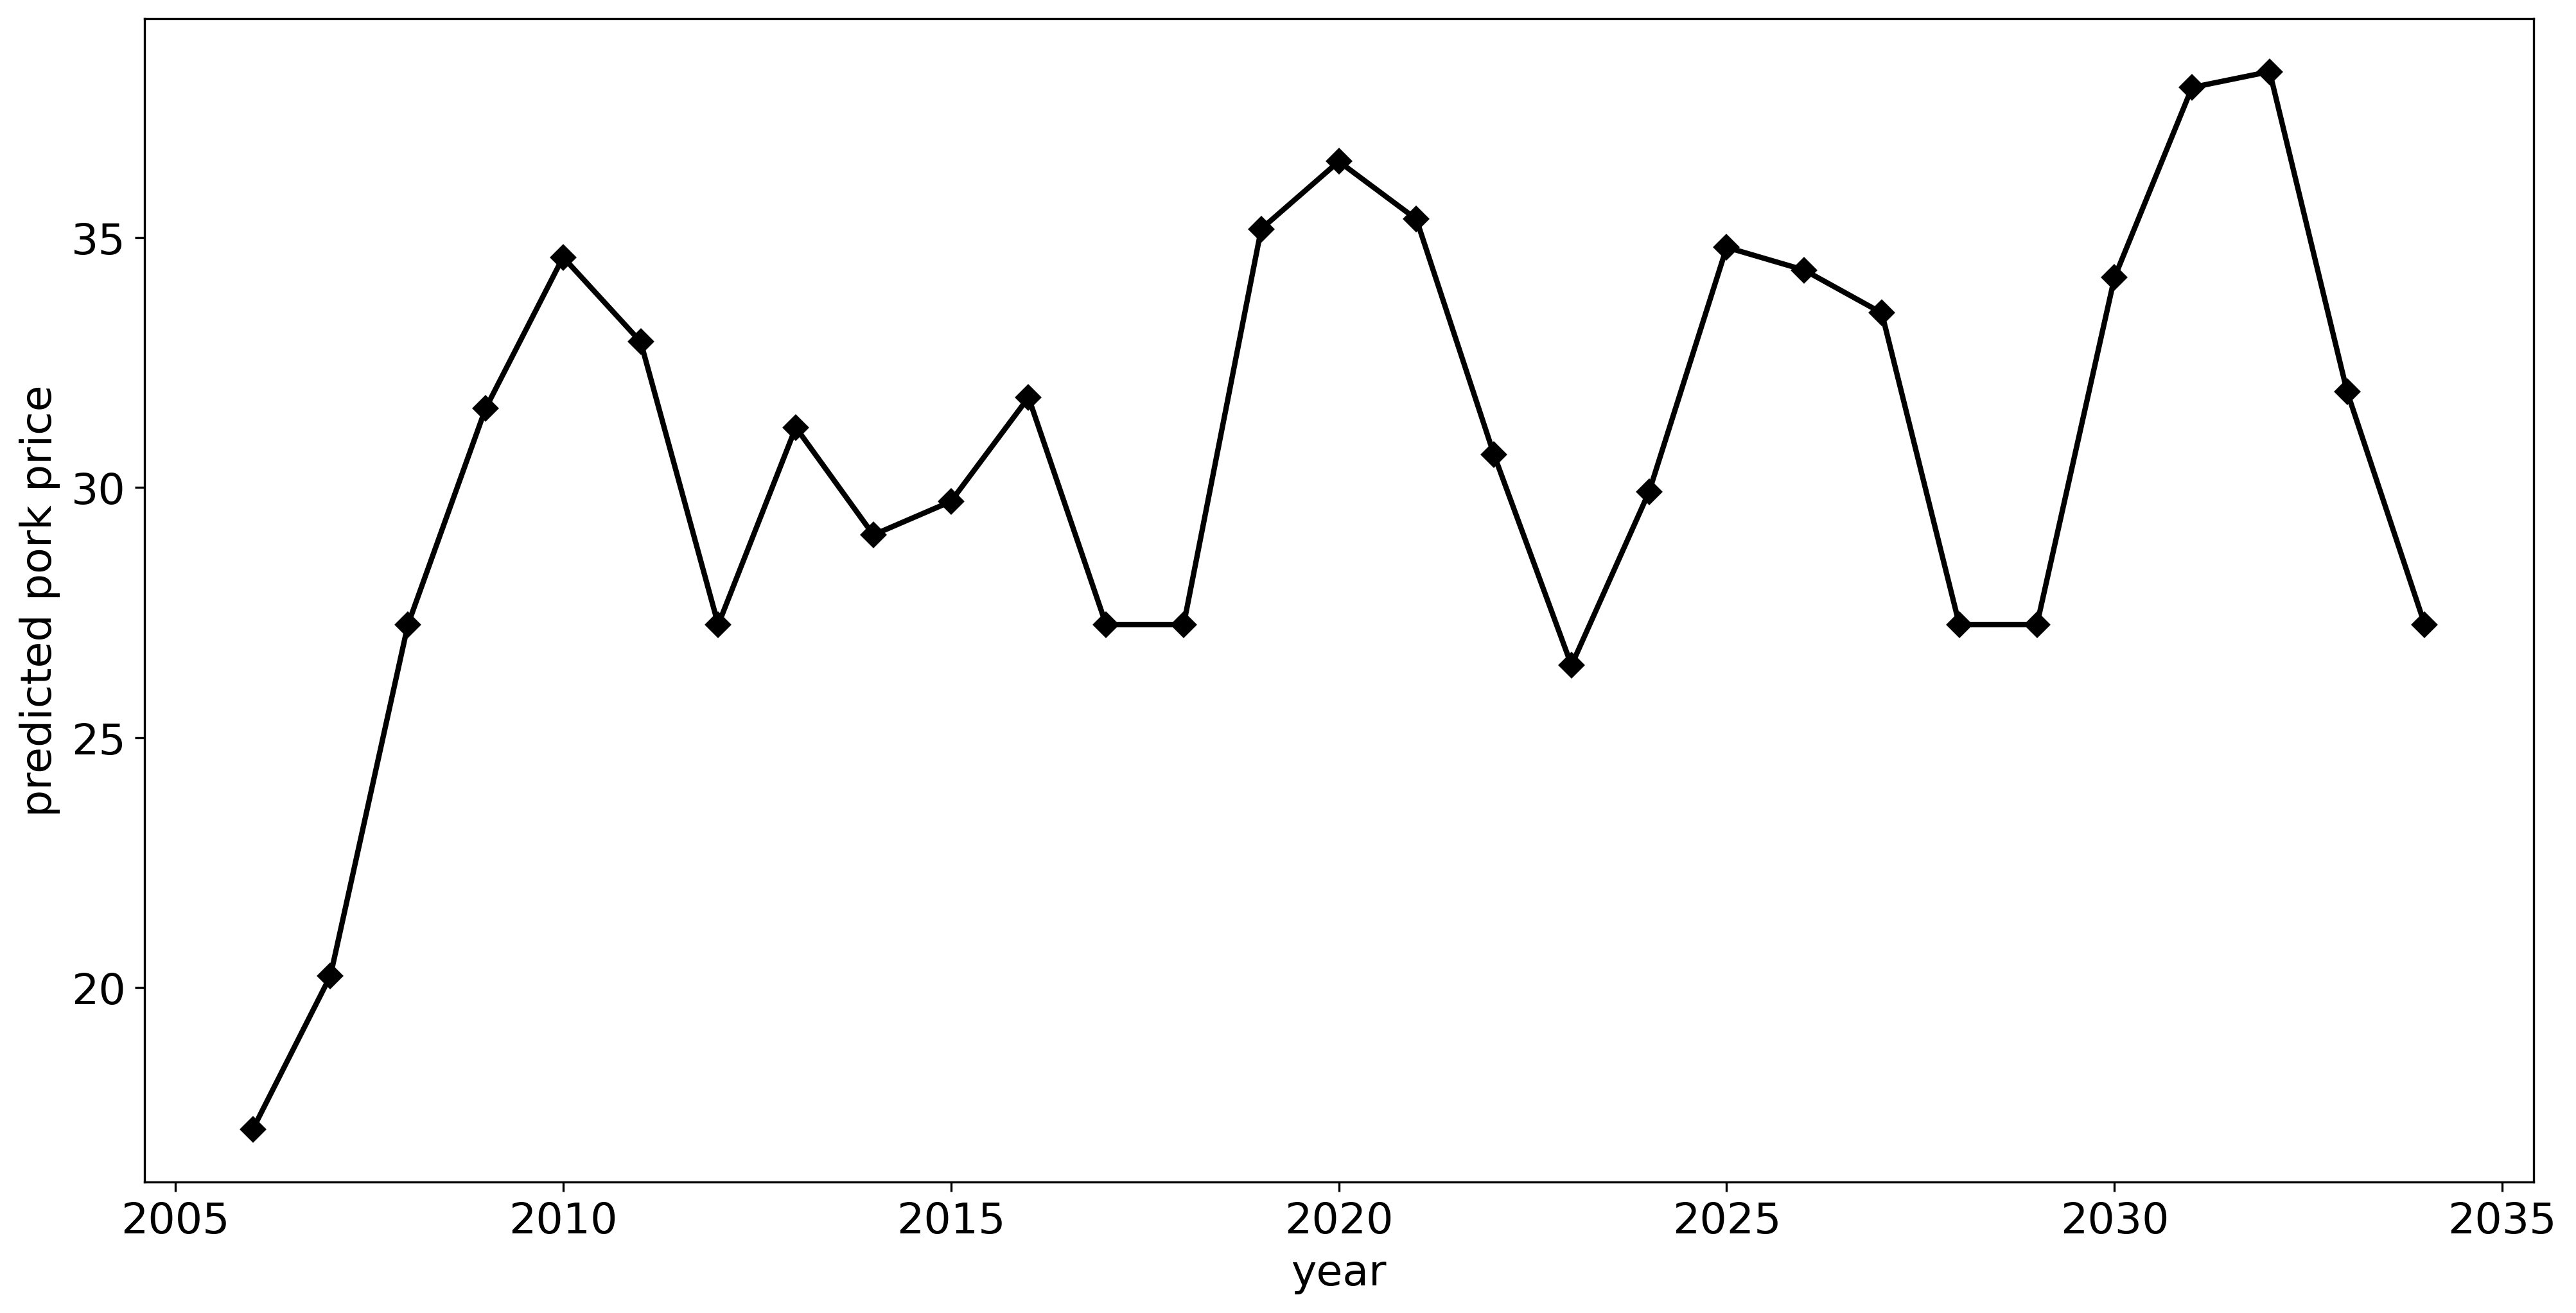

<Figure size 432x288 with 0 Axes>

In [36]:
# draw the simulation result
plt.figure(figsize=(16,8),dpi=300)
plt.plot(year, price, color='black', marker='D', linestyle='-', linewidth=2.0, label='predicted pork price')
#plt.legend(fontsize=16)  # 显示图例
plt.xlabel("year", fontsize=16)  # X轴标签
plt.ylabel("predicted pork price", fontsize=16)  # Y轴标签
plt.tick_params(labelsize=16)
plt.show()
plt.savefig('结果.png')

In [37]:
# statistic of the prediction
np.array(price).mean()

30.628281524772476

In [38]:
np.array(price).std()

4.7653545626185

In [39]:
# create table containing prediction and actual data
predict_price = pd.DataFrame({'date':year,'predict price':price})
de_cpi_price['date'] = de_cpi_price['date'].astype(int)
result = pd.merge(de_cpi_price,predict_price,how='inner')
result = result.sort_values(by='date')
result = result.reset_index(drop=True)
result

,cpi_value,pork_price,de_price,date,total_amount_sale,predict price
0,68.710698,13.033067,18.955293,2006,61209.0,17.170286
1,71.901943,18.733004,25.984452,2007,56640.9,20.236903
2,76.162313,22.879333,30.026348,2008,61278.9,27.260332
3,75.607726,17.642937,23.327972,2009,64990.9,31.577283
4,78.008517,18.031181,23.091733,2010,67332.7,34.605007
5,82.341031,25.795333,31.303684,2011,67030.0,32.912259
6,84.497974,23.331000,27.608342,2012,70724.5,27.257402
7,86.712708,23.040417,26.566778,2013,72768.0,31.202333
8,88.379016,20.972514,23.728157,2014,74951.5,29.053348
9,89.649043,23.207708,25.881365,2015,72415.6,29.721617


In [40]:
# calculate the correlation of prediction and the actual value
result['de_price'].corr(result['predict price'])

0.5769616603571548

In [41]:
# calculate the correlation during the bad fitting
result['de_price'][3:7].corr(result['predict price'][3:7])

-0.23571975933356162

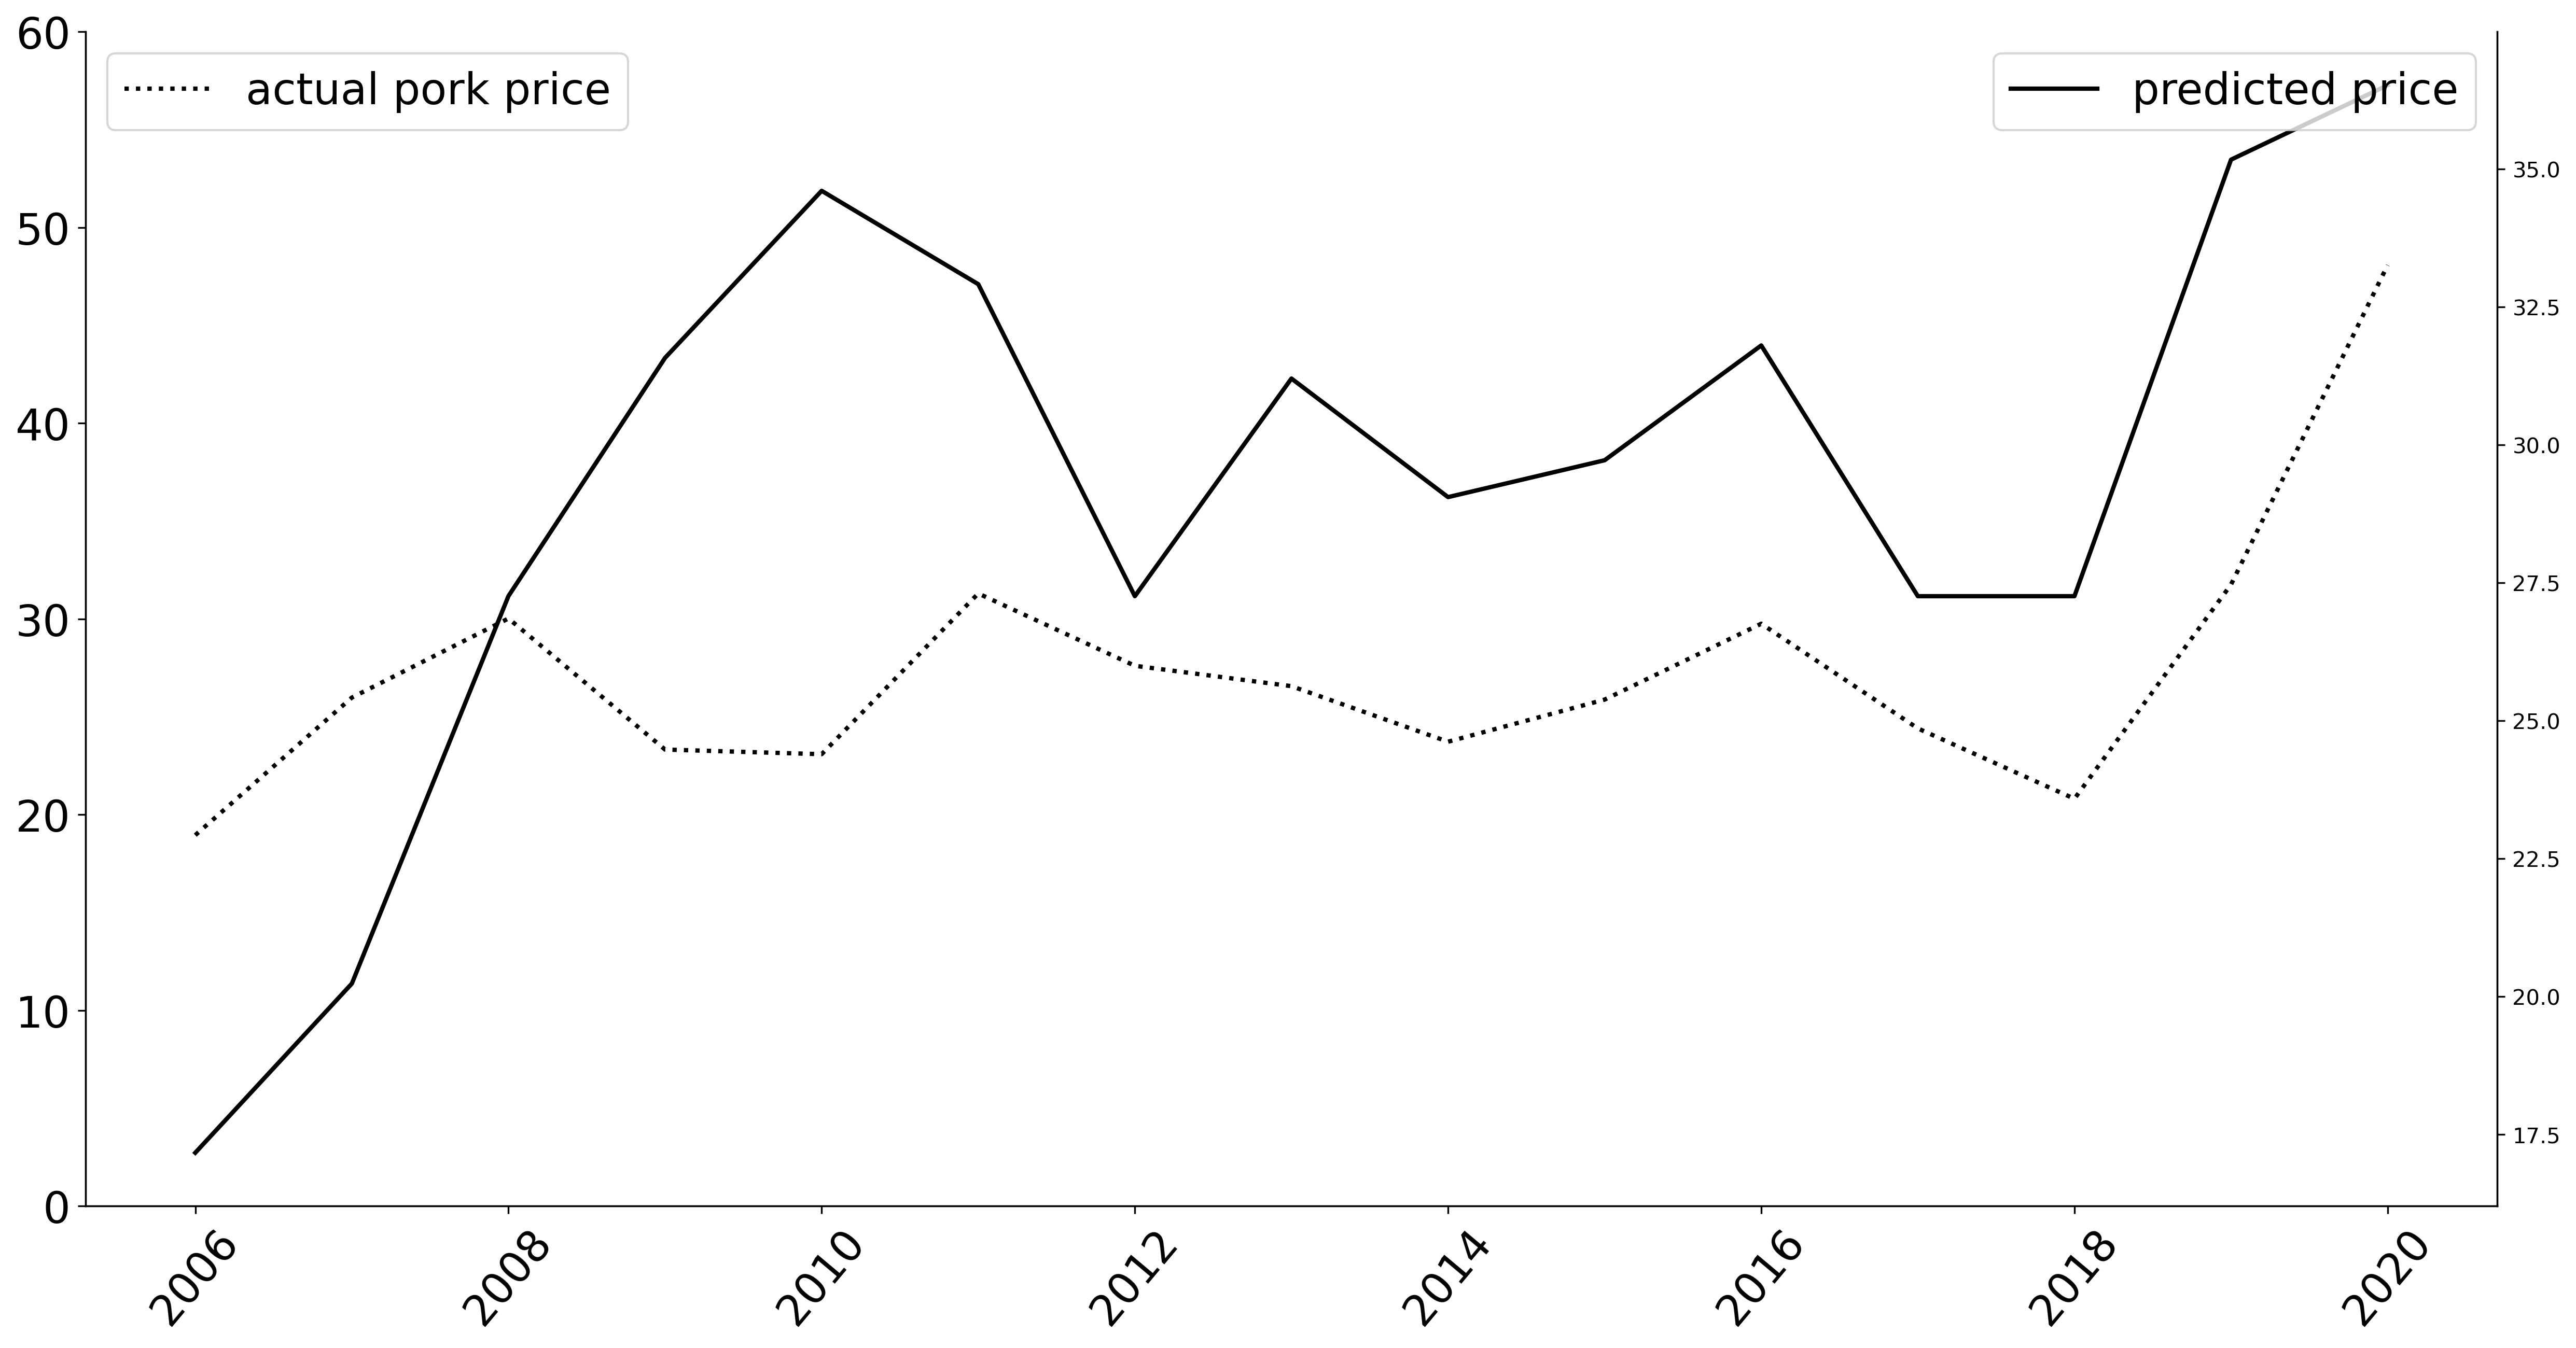

In [42]:
# visualizing the result
plt.figure(figsize=(20,10),dpi=300)
plt.ylim(0,60)
x_major_locator=MultipleLocator(2)
plt.xticks(rotation=50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.plot(result['date'], result['de_price'], color='black', linestyle=':', linewidth=2.0, label='actual pork price')
l1 = plt.legend(loc=2,prop={'size':20})
ax2=ax.twinx()
ax2.plot(result['date'], result['predict price'], color='black', linestyle='-', linewidth=2.0, label='predicted price')
#ax2.set_ylim([0,60])
#ax2.tick_params(labelsize=20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_color('none')
plt.legend(loc=1,prop={'size':20})

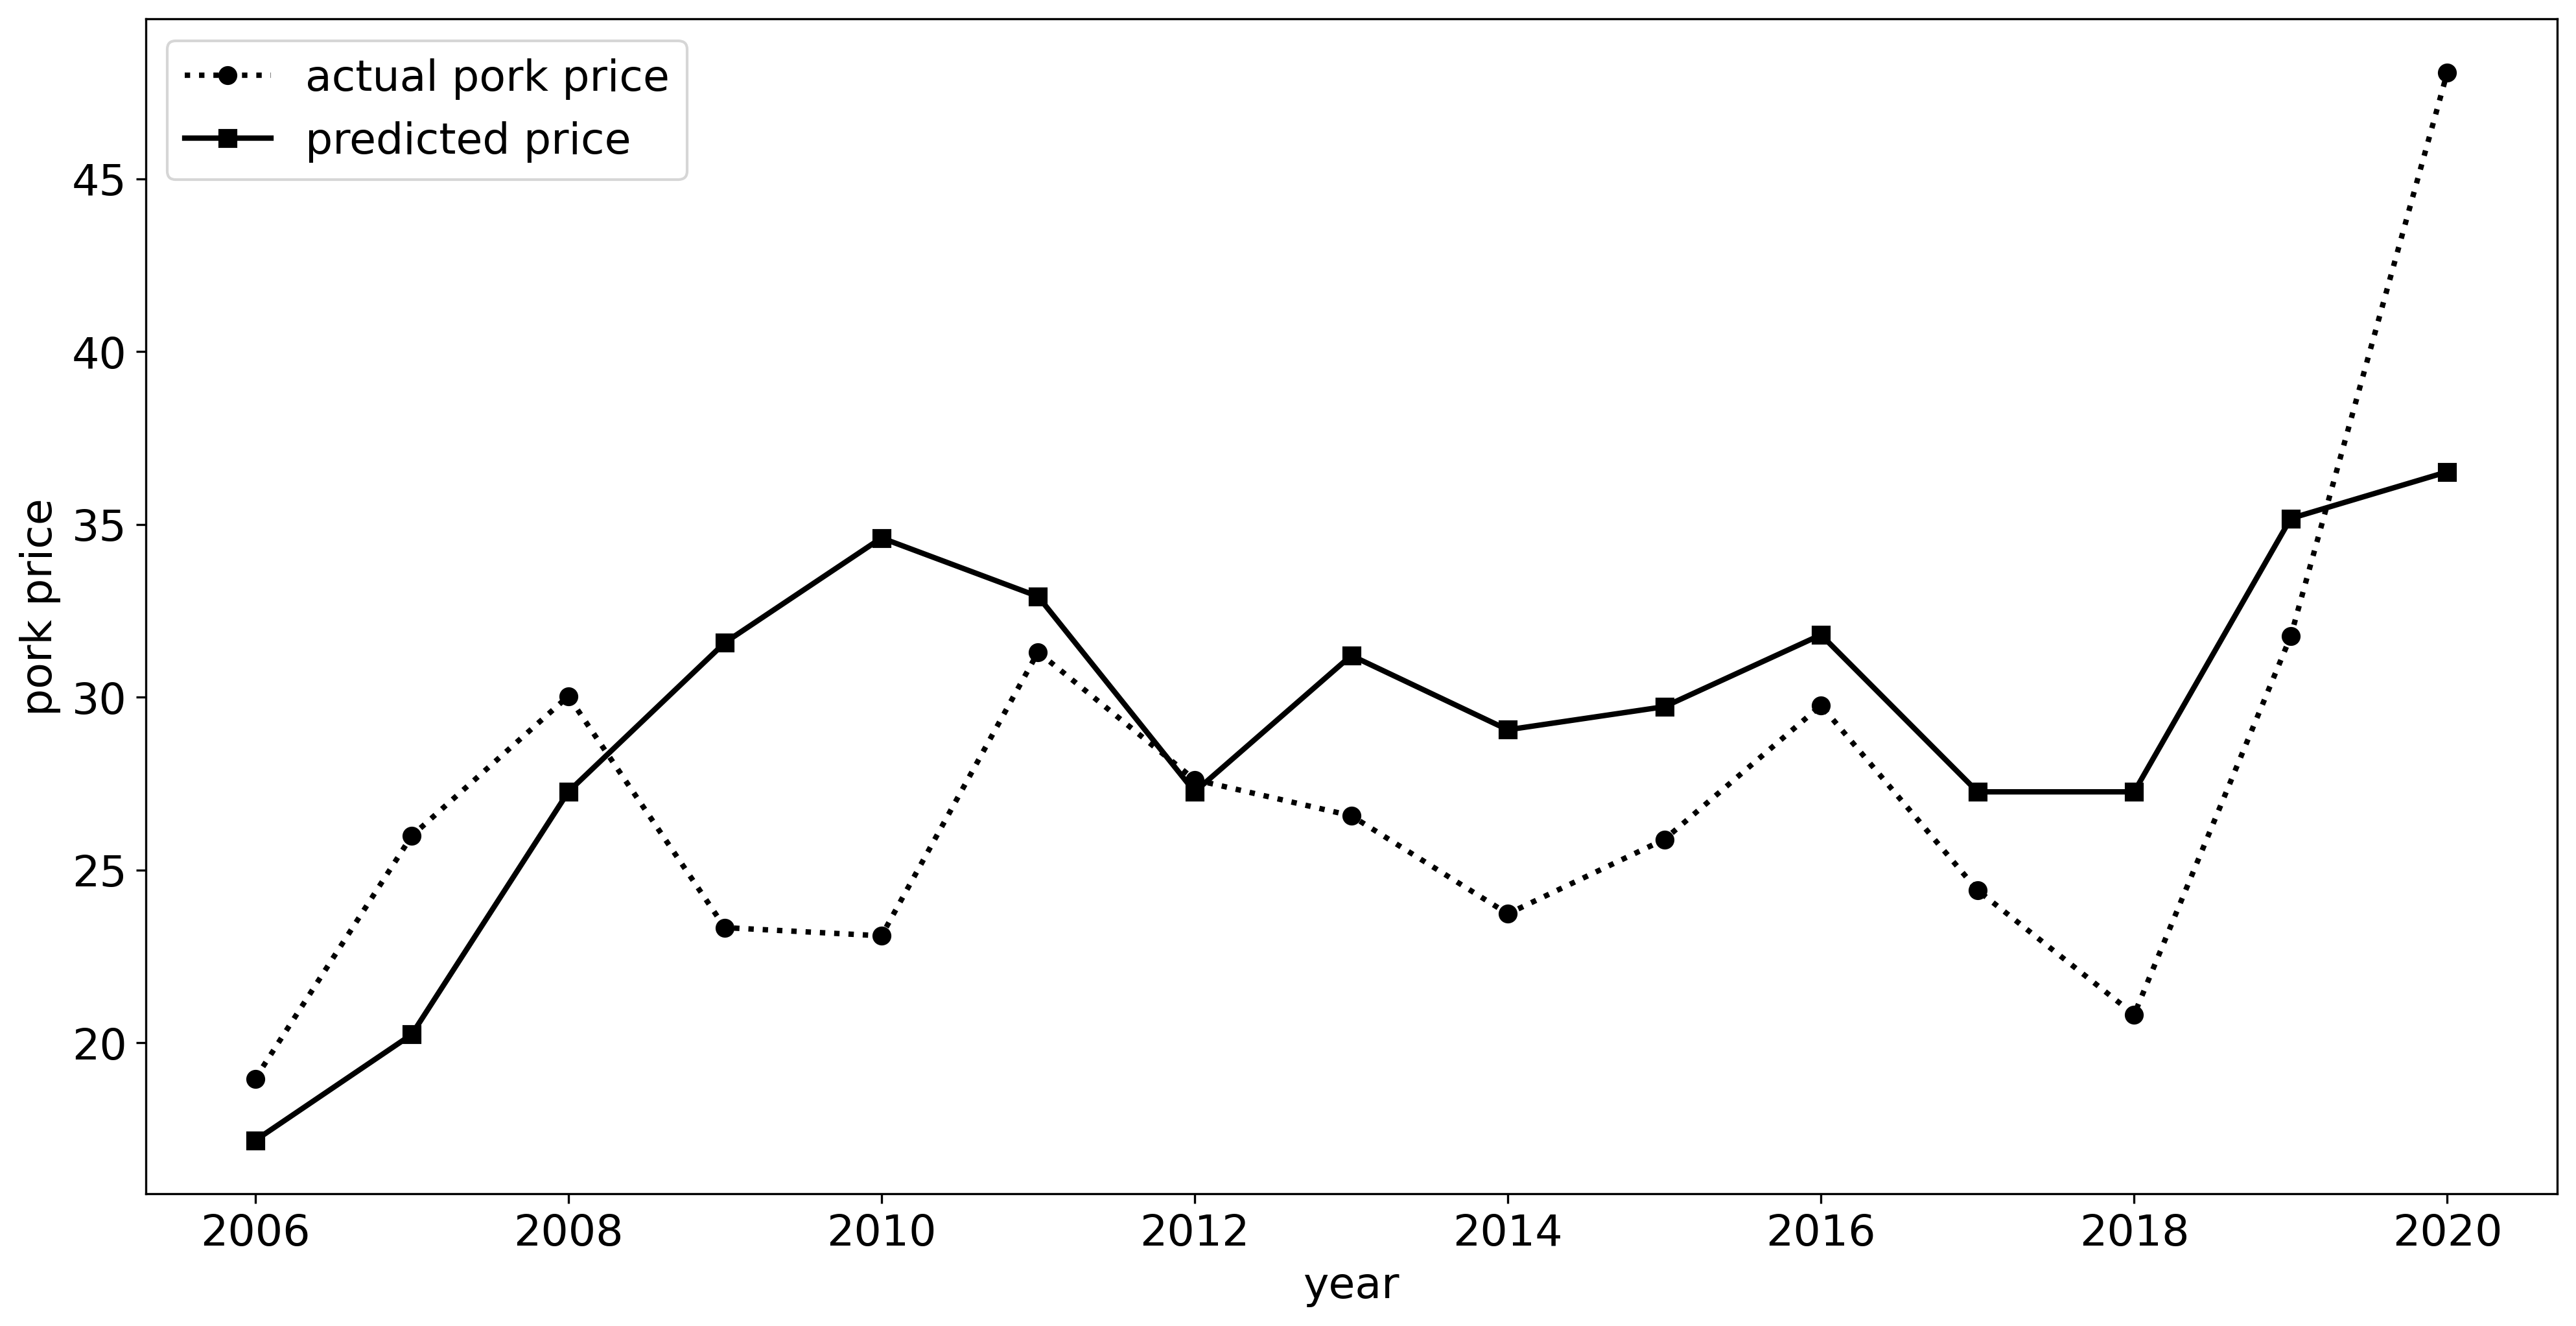

<Figure size 432x288 with 0 Axes>

In [43]:
# draw the simulation result
plt.figure(figsize=(16,8),dpi=300)
plt.plot(result['date'], result['de_price'], marker='o', color='black', linestyle=':', linewidth=2.0, label='actual pork price')
plt.plot(result['date'], result['predict price'], marker='s', color='black', linestyle='-', linewidth=2.0, label='predicted price')
plt.legend(fontsize=16)  # 显示图例
plt.xlabel("year", fontsize=16)  # X轴标签
plt.ylabel("pork price", fontsize=16)  # Y轴标签
plt.tick_params(labelsize=16)
plt.show()
plt.savefig('对比.png')

# Sensitivity analysis

In [44]:
# set the sensitivity testing funtion on the forage price
def supply_forage_test(female_begin,last_pr,last_profit, forage_price):

    fun = lambda x : (-(sum(birth_hog*female_begin)+birth_hog[0]*x)*70*regr.predict(np.array([(sum(birth_hog*female_begin)+x*birth_hog[0])]))-((x*birth_hog[0]+x*L_female_annual[0,0])*forage_price*1.5*365+x*30*37.4)) # 目标函数
    cons = (
            {'type': 'ineq', 'fun': lambda x: x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: -x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: last_profit-((x*birth_hog[0]+x*L_female_annual[0,0])*forage_price*1.5*365+x*30*37.4)},
           )

    x0 = 500 # 设置初始值(随机设置即可)

    res = minimize(fun, x0, method='SLSQP', constraints=cons) # 调用最小值模块
    solution = res.x
    return solution


#sensitivity analysis on forage price
forage_test = [2.33, 3.16]

for m in forage_test:
    price_2006 = regr.predict(np.array([[hog_initial_2006]]))[0]
    profit_2006 = profit(hog_initial_2006.flatten(order='A'),initial_female.flatten(order='A'),price_2006)

    year = [2006]
    female = [initial_female.flatten(order='A')]
    hog = [hog_initial_2006]
    price = [price_2006]
    profit_value = [profit_2006]
    input_year = []

    for i in range(2007,2035):
        new_input = supply_forage_test(female[i-2007],price[i-2007],profit_value[i-2007],m)
        female_begin = female[i-2007]
        female_begin[0] = female_begin[0]+new_input

        female_this_year = L_female_annual@female_begin
        hog_this_year = sum(birth_hog*female_begin)*survival_hog
        price_this_year = regr.predict(np.array([[hog_this_year]]))[0]
        profit_this_year = profit(hog_this_year,female_this_year,price_this_year)-new_input*30*3.5

        input_year.append(new_input)
        female.append(female_this_year)
        hog.append(hog_this_year)
        price.append(price_this_year)
        profit_value.append(profit_this_year)
        year.append(i)
        
    title = 'forage' + str(m)
    predict_price[title] = price

In [45]:
# set the sensitivity testing funtion on the female piglet price
def supply_piggy_test(female_begin,last_pr,last_profit, piggy_price):

    fun = lambda x : (-(sum(birth_hog*female_begin)+birth_hog[0]*x)*70*regr.predict(np.array([(sum(birth_hog*female_begin)+x*birth_hog[0])]))-((x*birth_hog[0]+x*L_female_annual[0,0])*2.71*1.5*365+x*30*piggy_price)) # 目标函数
    cons = (
            {'type': 'ineq', 'fun': lambda x: x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: -x+0.8*female_begin[0]},
            {'type': 'ineq', 'fun': lambda x: last_profit-((x*birth_hog[0]+x*L_female_annual[0,0])*2.71*1.5*365+x*30*piggy_price)},
           )

    x0 = 500 # 设置初始值(随机设置即可)

    res = minimize(fun, x0, method='SLSQP', constraints=cons) # 调用最小值模块
    solution = res.x
    return solution

#sensitivity analysis on piglet price
piggy_test = [14.93, 59.95]

for m in piggy_test:
    price_2006 = regr.predict(np.array([[hog_initial_2006]]))[0]
    profit_2006 = profit(hog_initial_2006.flatten(order='A'),initial_female.flatten(order='A'),price_2006)

    year = [2006]
    female = [initial_female.flatten(order='A')]
    hog = [hog_initial_2006]
    price = [price_2006]
    profit_value = [profit_2006]
    input_year = []

    for i in range(2007,2035):
        new_input = supply_piggy_test(female[i-2007],price[i-2007],profit_value[i-2007],m)
        female_begin = female[i-2007]
        female_begin[0] = female_begin[0]+new_input

        female_this_year = L_female_annual@female_begin
        hog_this_year = sum(birth_hog*female_begin)*survival_hog
        price_this_year = regr.predict(np.array([[hog_this_year]]))[0]
        profit_this_year = profit(hog_this_year,female_this_year,price_this_year)-new_input*30*3.5

        input_year.append(new_input)
        female.append(female_this_year)
        hog.append(hog_this_year)
        price.append(price_this_year)
        profit_value.append(profit_this_year)
        year.append(i)
        
    title = 'piggy' + str(m)
    predict_price[title] = price

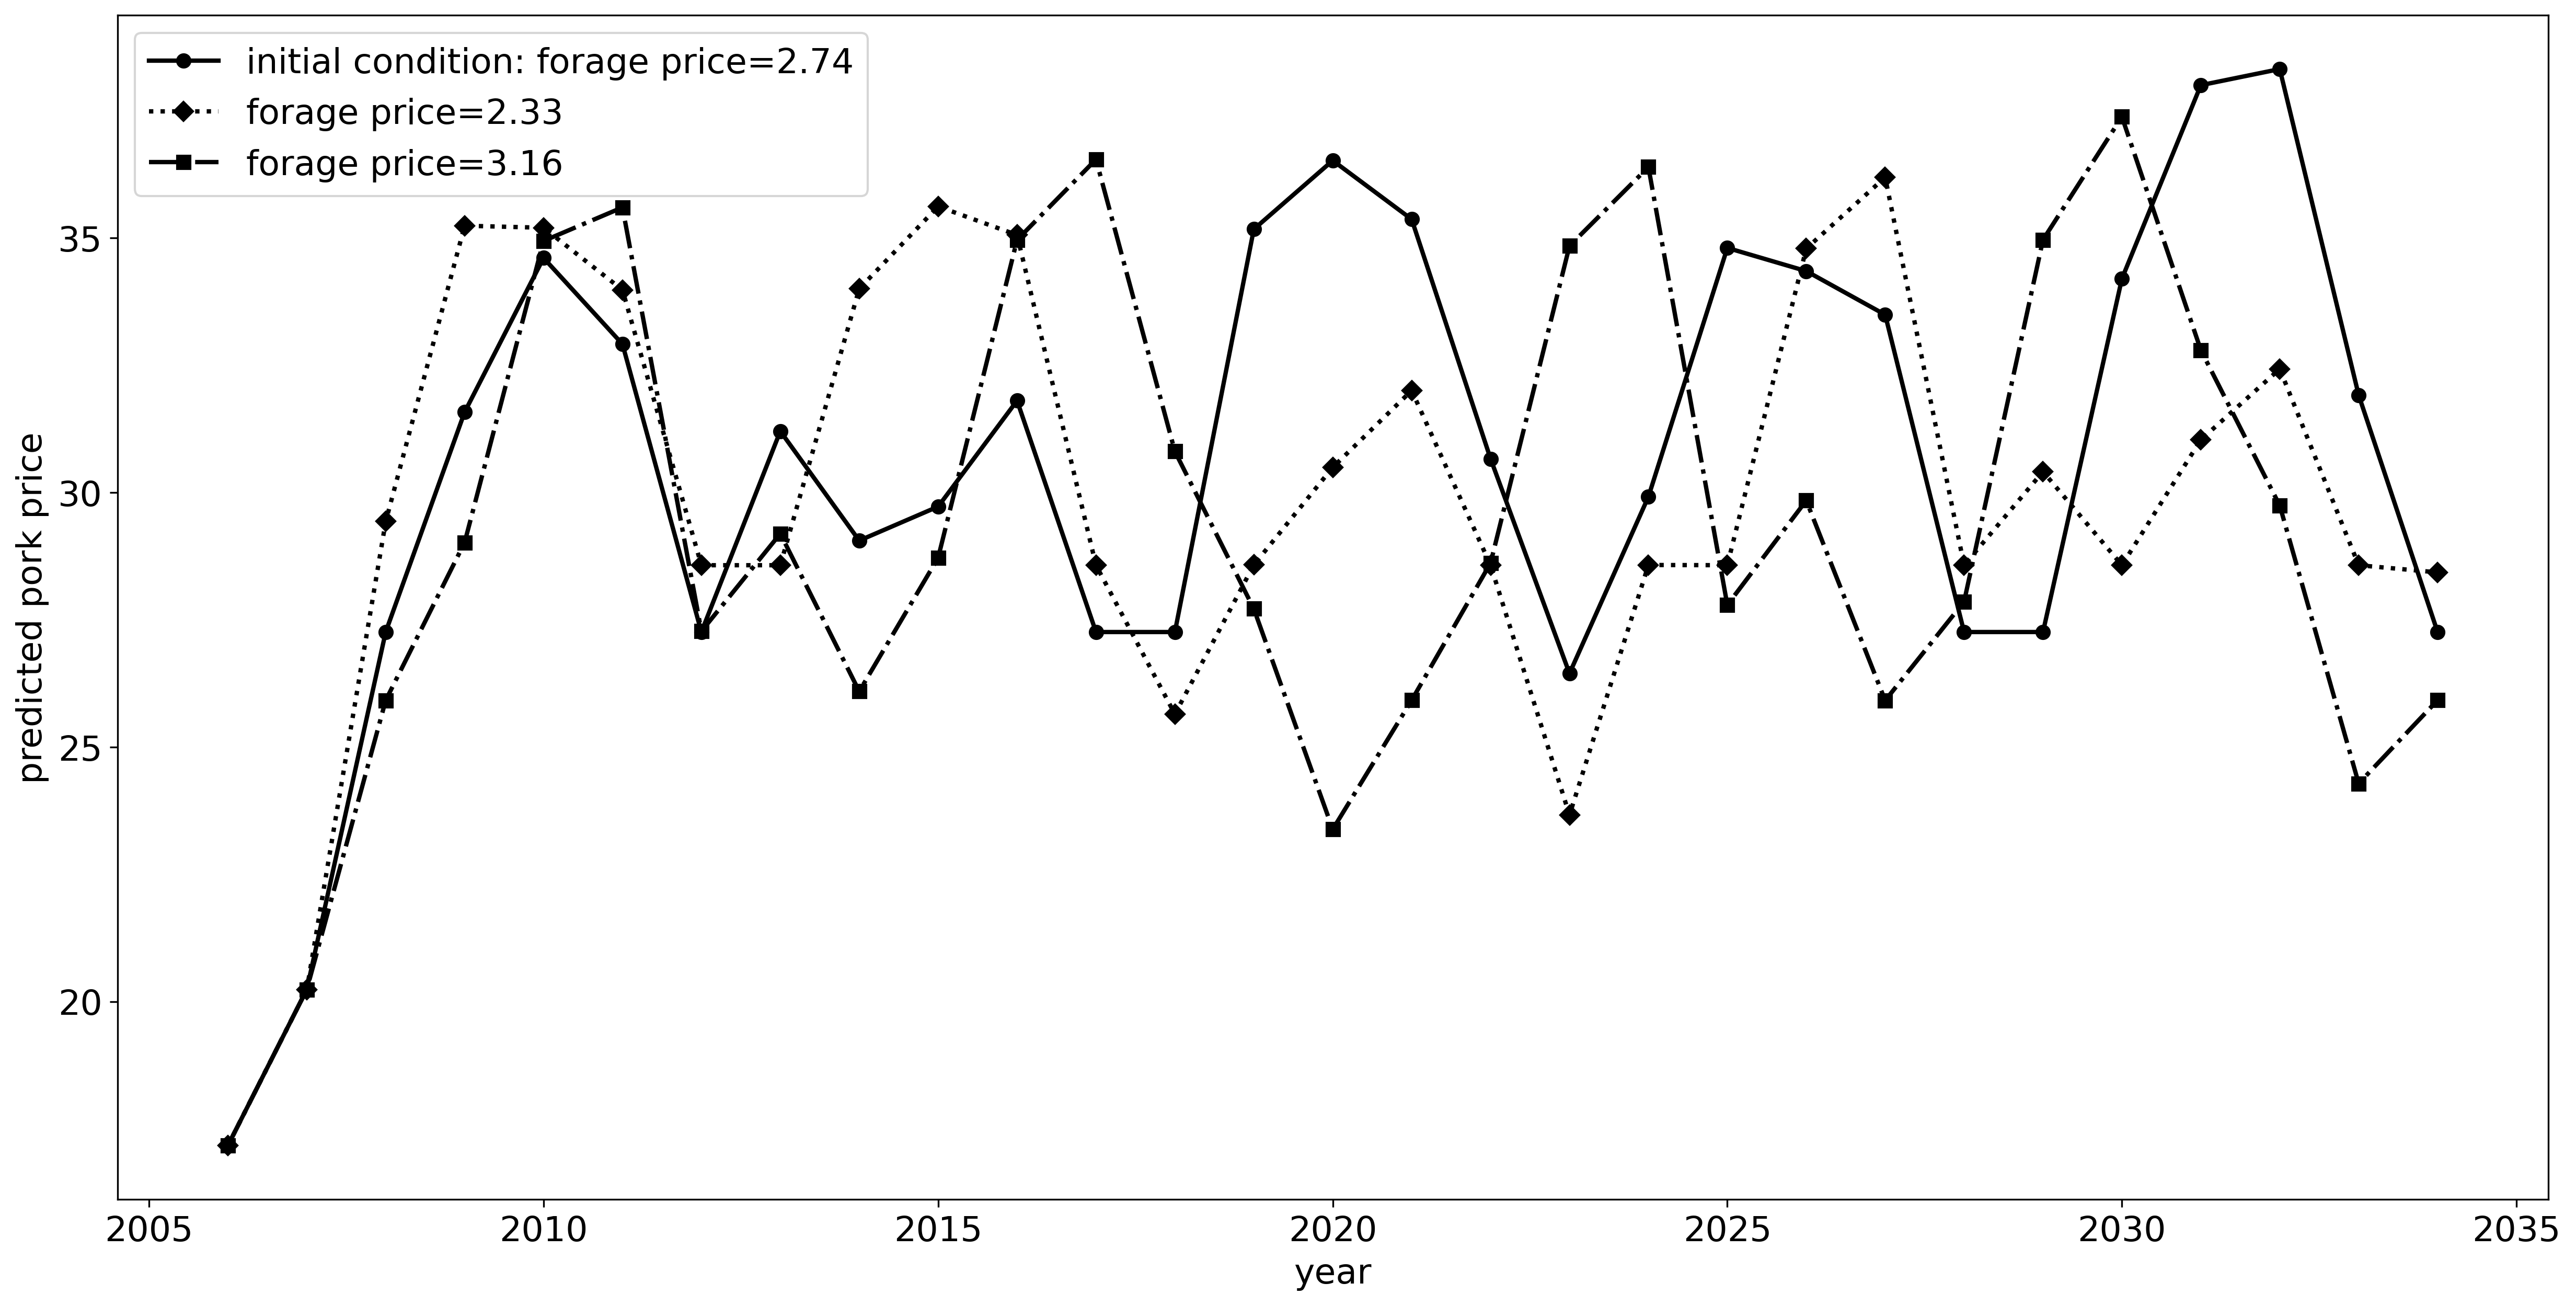

In [46]:
# visualize the sensitivity test on the forage price
plt.figure(figsize=(20,10),dpi=300)
plt.plot(predict_price['date'], predict_price['predict price'], marker='o', color='black',linestyle='-',linewidth=2.0, label='initial condition: forage price=2.74')
plt.plot(predict_price['date'], predict_price['forage2.33'], marker='D', color='black',linestyle=':',linewidth=2.0, label='forage price=2.33')
plt.plot(predict_price['date'], predict_price['forage3.16'], marker='s', color='black',linestyle='-.',linewidth=2.0, label='forage price=3.16')
plt.legend(fontsize=16)  # 显示图例
plt.tick_params(labelsize=16)
plt.xlabel("year", fontsize=16)  # X轴标签
plt.ylabel("predicted pork price", fontsize=16)  # Y轴标签
plt.show()
#plt.savefig('forage.png')

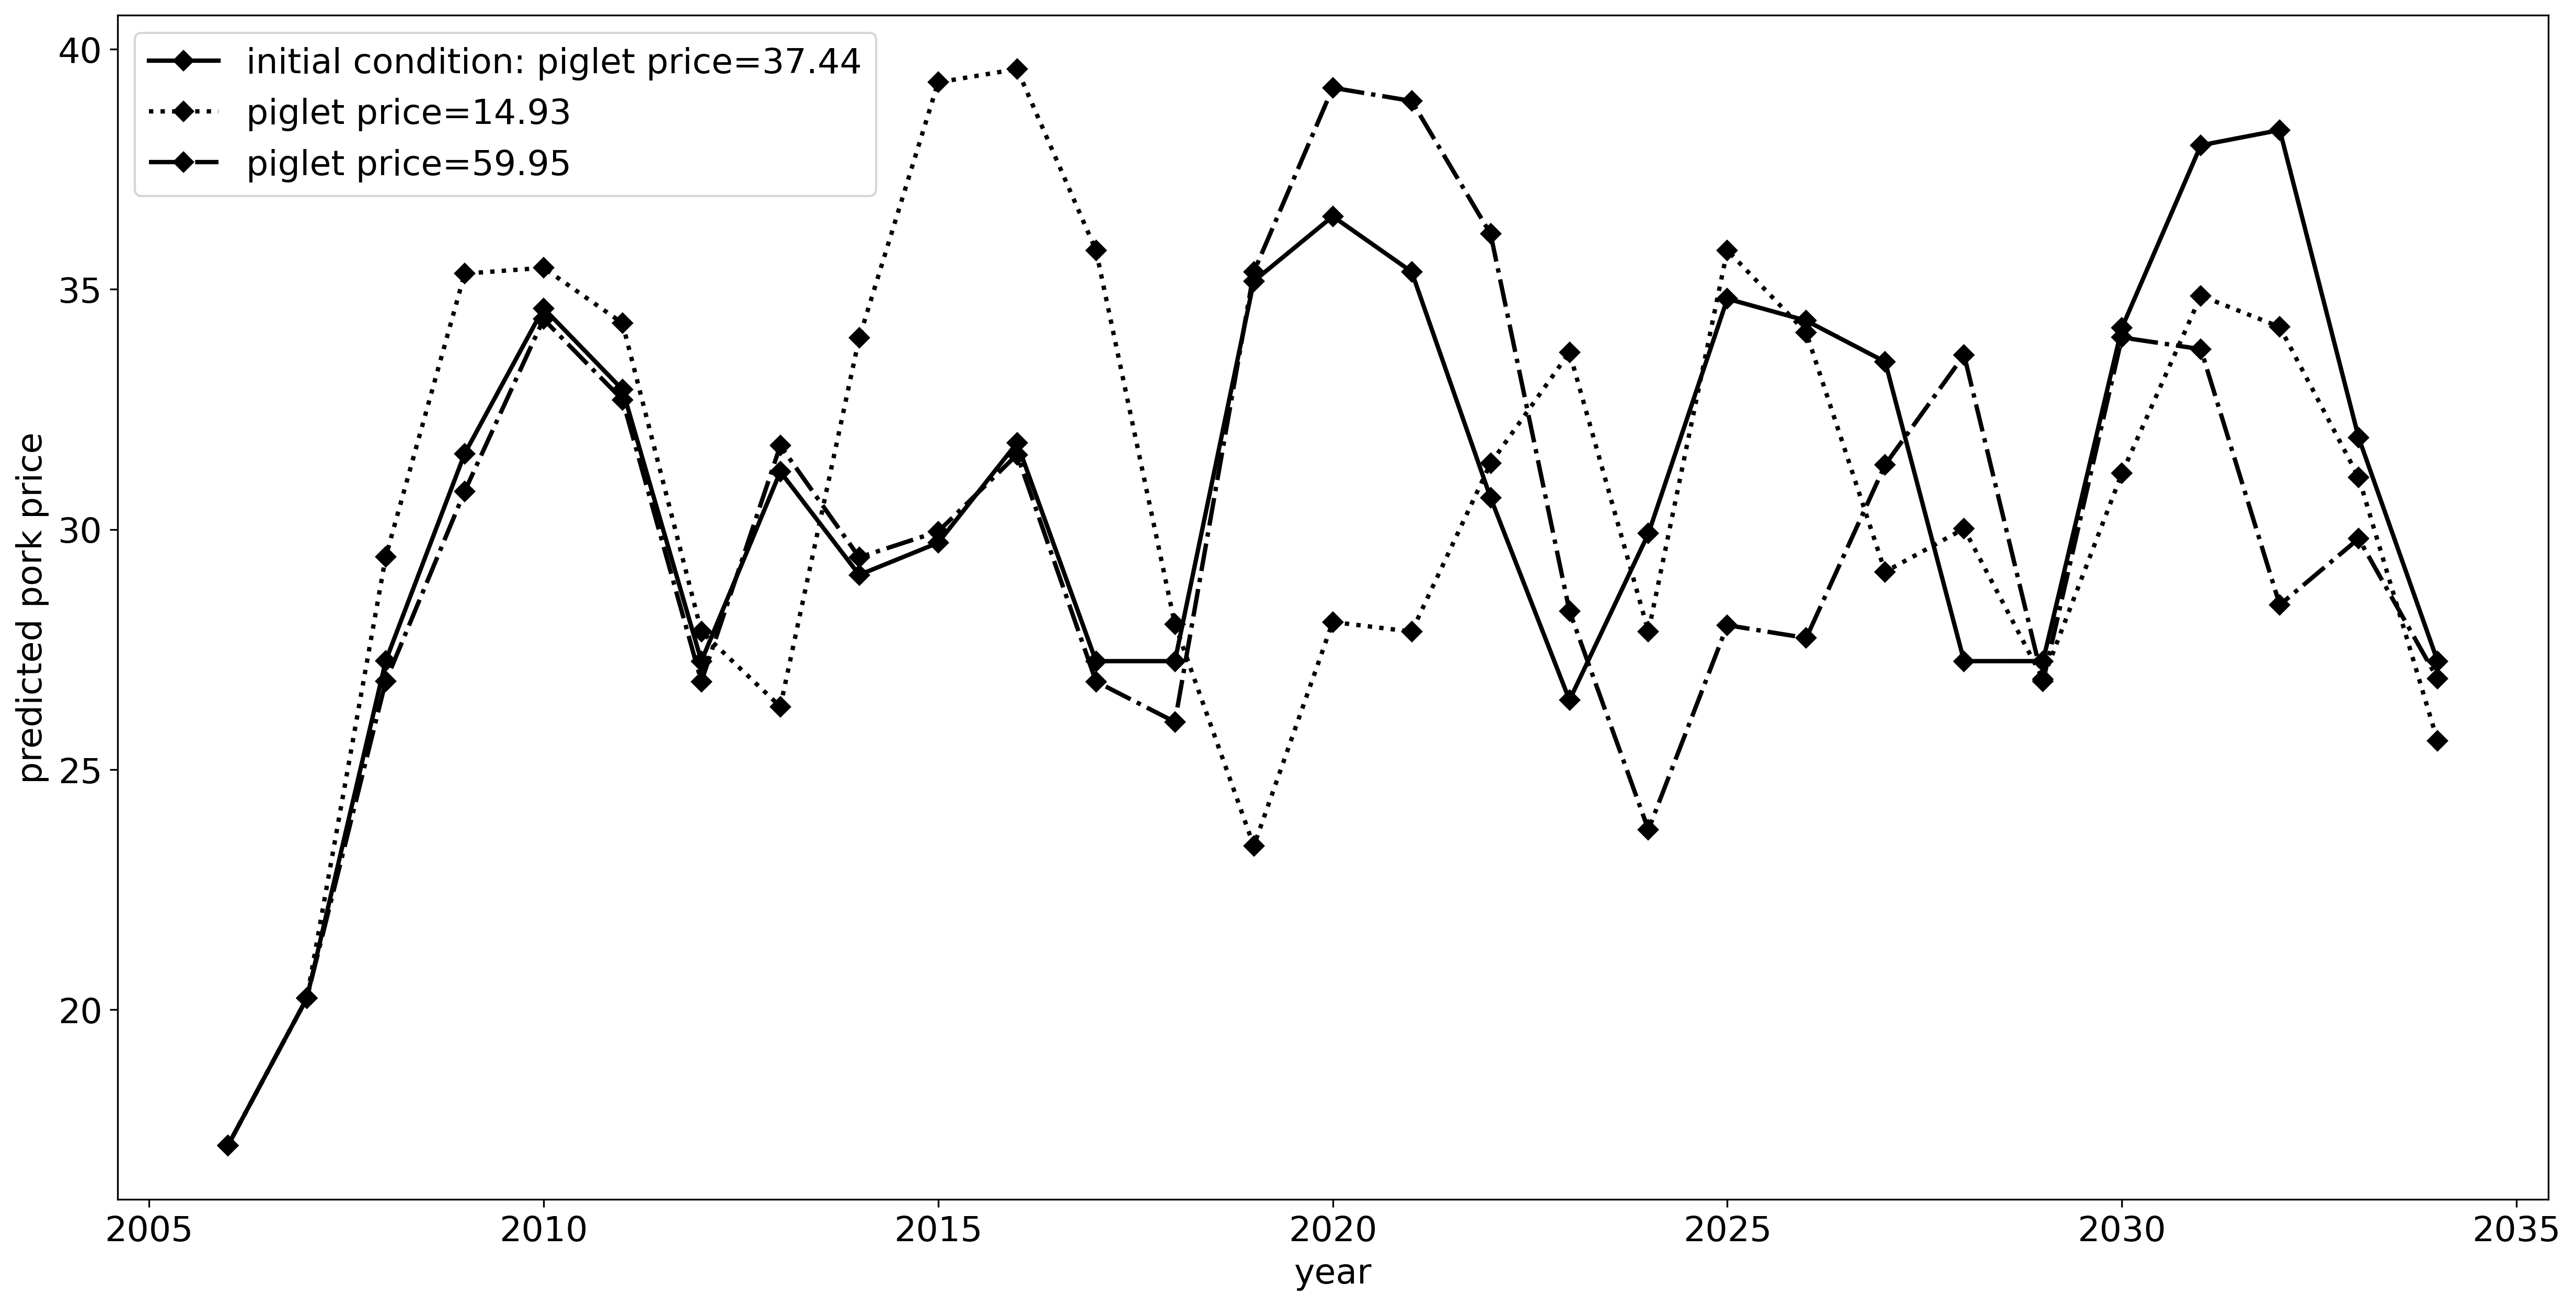

In [47]:
# visualize the sensitivity test on the female piglet price
plt.figure(figsize=(20,10),dpi=300)
plt.plot(predict_price['date'], predict_price['predict price'], marker='D', color='black',linestyle='-',linewidth=2.0, label='initial condition: piglet price=37.44')
plt.plot(predict_price['date'], predict_price['piggy14.93'], marker='D', color='black',linestyle=':',linewidth=2.0, label='piglet price=14.93')
plt.plot(predict_price['date'], predict_price['piggy59.95'], marker='D', color='black',linestyle='-.',linewidth=2.0, label='piglet price=59.95')
plt.legend( fontsize=16)  # 显示图例
plt.tick_params(labelsize=16)
plt.xlabel("year", fontsize=16)  # X轴标签
plt.ylabel("predicted pork price", fontsize=16)  # Y轴标签
plt.show()
#plt.savefig('piglet.png')